## Import Libraries

In [1]:
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 30.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=083b7086f74eac3e3fe7846ee9f6d41d7a21414f343929aa78c16fefbb9116e1
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.2.1
    Uninstalling pydantic-2.

In [2]:
#all the librarys used in this project
import pandas as pd
import numpy as np

import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import preprocessing

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz

from IPython.display import Image
!pip install pydotplus
import pydotplus
import graphviz
from six import StringIO
import pandas_profiling as pp

import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO

from pydot import graph_from_dot_data
from sklearn.utils import resample



from sklearn.tree import export_graphviz
import pydot
import random

%matplotlib inline

<ipython-input-2-4a9aaaa0dc04>:35: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


## Uploading DataSet

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# read our data
df = pd.read_csv("/content/drive/MyDrive/dataset/companies.csv")


In [5]:
df

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,c:99940,196548,Company,99940,NaN,Webgility,webgility,/company/webgility,ecommerce,operating,...,2013-08-12,2013-08-12,2.0,5.0,NaN,2011-09-06 23:17:56,2013-08-13 00:39:13,37.774929,-122.419415,NaN
196549,c:9995,196549,Company,9995,NaN,FohBoh,fohboh,/company/fohboh,public_relations,operating,...,2013-05-01,2013-05-01,1.0,14.0,NaN,2008-08-24 15:46:26,2013-06-28 20:55:30,37.338208,-121.886329,NaN
196550,c:9996,196550,Company,9996,NaN,CSC,csc,/company/csc,consulting,operating,...,2012-01-01,2013-10-30,3.0,44.0,NaN,2008-08-24 15:46:58,2013-06-28 20:52:01,38.882334,-77.171091,NaN
196551,c:9997,196551,Company,9997,NaN,Top-candidate,top candidate,/company/top-candidate,search,operating,...,NaN,NaN,NaN,1.0,NaN,2008-08-24 16:00:22,2013-06-28 20:56:44,34.052234,-118.243685,NaN


In [6]:
df.head()#top 5 rows

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


In [7]:
df.info()# date is not being read properly, some numerical values like funding_total_usd is being read as a object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   196553 non-null  object 
 1   Unnamed: 0.1         196553 non-null  int64  
 2   entity_type          196553 non-null  object 
 3   entity_id            196553 non-null  int64  
 4   parent_id            0 non-null       float64
 5   name                 196531 non-null  object 
 6   normalized_name      196527 non-null  object 
 7   permalink            196553 non-null  object 
 8   category_code        123186 non-null  object 
 9   status               196553 non-null  object 
 10  founded_at           91227 non-null   object 
 11  closed_at            2620 non-null    object 
 12  domain               126545 non-null  object 
 13  homepage_url         126545 non-null  object 
 14  twitter_username     80591 non-null   object 
 15  logo_url         

In [8]:
df.shape # size of the data

(196553, 44)

In [9]:
df.columns # column names

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

## Data Preprossing

In [10]:
print("Number of Duplicate Rows:", df.duplicated().sum())

Number of Duplicate Rows: 0


In [11]:
df.isnull().sum()

id                          0
Unnamed: 0.1                0
entity_type                 0
entity_id                   0
parent_id              196553
name                       22
normalized_name            26
permalink                   0
category_code           73367
status                      0
founded_at             105326
closed_at              193933
domain                  70008
homepage_url            70008
twitter_username       115962
logo_url                86443
logo_width              86443
logo_height             86443
short_description      189422
description            104505
overview                69582
tag_list               115101
country_code           108563
state_code             145650
city                   112663
region                      0
first_investment_at    193970
last_investment_at     193970
investment_rounds      193962
invested_companies     193962
first_funding_at       165046
last_funding_at        165046
funding_rounds         164846
funding_to

In [12]:
# DataFrame containing 'operating' or 'IPo'
operated_df = df[df['status']=='operating']
ipo_df = df[df['status']=='ipo']
closed_df = df[df['status']=='closed']
acquired_df = df[df['status']=='acquired']

In [13]:
operated_df.isnull().sum()

id                          0
Unnamed: 0.1                0
entity_type                 0
entity_id                   0
parent_id              183441
name                       22
normalized_name            26
permalink                   0
category_code           70376
status                      0
founded_at              99598
closed_at              183441
domain                  67584
homepage_url            67584
twitter_username       106982
logo_url                83749
logo_width              83749
logo_height             83749
short_description      177446
description             97560
overview                67806
tag_list               105919
country_code           105307
state_code             139642
city                   108999
region                      0
first_investment_at    181195
last_investment_at     181195
investment_rounds      181188
invested_companies     181188
first_funding_at       157033
last_funding_at        157033
funding_rounds         156906
funding_to

In [14]:
ipo_df.isnull().sum()

id                        0
Unnamed: 0.1              0
entity_type               0
entity_id                 0
parent_id              1134
name                      0
normalized_name           0
permalink                 0
category_code            52
status                    0
founded_at              492
closed_at              1134
domain                   10
homepage_url             10
twitter_username        569
logo_url                 17
logo_width               17
logo_height              17
short_description      1018
description             711
overview                  7
tag_list                906
country_code             38
state_code              225
city                     65
region                    0
first_investment_at     920
last_investment_at      920
investment_rounds       920
invested_companies      920
first_funding_at        645
last_funding_at         645
funding_rounds          644
funding_total_usd       654
first_milestone_at      258
last_milestone_at   

In [15]:
closed_df.isnull().sum()

id                        0
Unnamed: 0.1              0
entity_type               0
entity_id                 0
parent_id              2584
name                      0
normalized_name           0
permalink                 0
category_code            90
status                    0
founded_at              609
closed_at                 0
domain                   68
homepage_url             68
twitter_username       1510
logo_url                237
logo_width              237
logo_height             237
short_description      1919
description             830
overview                 45
tag_list               1085
country_code            494
state_code             1262
city                    616
region                    0
first_investment_at    2573
last_investment_at     2573
investment_rounds      2573
invested_companies     2573
first_funding_at        557
last_funding_at         557
funding_rounds          495
funding_total_usd       836
first_milestone_at     1258
last_milestone_at   

**Delete Columns with missing values greater than 20000**

In [16]:
# Set the threshold for missing values
threshold = 20000

# Filter columns based on the number of missing values
columns_to_keep = df.columns[df.isnull().sum() <= threshold]

# Create a new DataFrame with only the selected columns
new_df = df[columns_to_keep]

# Display the new DataFrame
new_df


,id,Unnamed: 0.1,entity_type,entity_id,name,normalized_name,permalink,status,region,created_at,updated_at
0,c:1,0,Company,1,Wetpaint,wetpaint,/company/wetpaint,operating,Seattle,2007-05-25 06:51:27,2013-04-13 03:29:00
1,c:10,1,Company,10,Flektor,flektor,/company/flektor,acquired,Los Angeles,2007-05-31 21:11:51,2008-05-23 23:23:14
2,c:100,2,Company,100,There,there,/company/there,acquired,SF Bay,2007-08-06 23:52:45,2013-11-04 02:09:48
3,c:10000,3,Company,10000,MYWEBBO,mywebbo,/company/mywebbo,operating,unknown,2008-08-24 16:51:57,2008-09-06 14:19:18
4,c:10001,4,Company,10001,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,operating,unknown,2008-08-24 17:10:34,2008-09-06 14:19:18
...,...,...,...,...,...,...,...,...,...,...,...
196548,c:99940,196548,Company,99940,Webgility,webgility,/company/webgility,operating,SF Bay,2011-09-06 23:17:56,2013-08-13 00:39:13
196549,c:9995,196549,Company,9995,FohBoh,fohboh,/company/fohboh,operating,SF Bay,2008-08-24 15:46:26,2013-06-28 20:55:30
196550,c:9996,196550,Company,9996,CSC,csc,/company/csc,operating,Washington DC,2008-08-24 15:46:58,2013-06-28 20:52:01
196551,c:9997,196551,Company,9997,Top-candidate,top candidate,/company/top-candidate,operating,Los Angeles,2008-08-24 16:00:22,2013-06-28 20:56:44


In [17]:
new_df.isnull().sum()

id                  0
Unnamed: 0.1        0
entity_type         0
entity_id           0
name               22
normalized_name    26
permalink           0
status              0
region              0
created_at          0
updated_at          0
dtype: int64

Delete **id,Unnamed: 0.1**

and **entity_type** column because It is a categorical column has one value is 'company'entity_type**

In [18]:
columns_to_delete = ['id', 'Unnamed: 0.1', 'entity_type','normalized_name','permalink']

# Use the .drop() method to remove the specified columns
new_df.drop(columns=columns_to_delete, inplace=True)

<ipython-input-18-b68c90033e9a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(columns=columns_to_delete, inplace=True)


In [19]:
new_df.nunique()

entity_id     196553
name          196348
status             4
region          5847
created_at    182851
updated_at    183558
dtype: int64

Delete Rows with missing values

In [20]:
new_df=new_df.dropna()
new_df

,entity_id,name,status,region,created_at,updated_at
0,1,Wetpaint,operating,Seattle,2007-05-25 06:51:27,2013-04-13 03:29:00
1,10,Flektor,acquired,Los Angeles,2007-05-31 21:11:51,2008-05-23 23:23:14
2,100,There,acquired,SF Bay,2007-08-06 23:52:45,2013-11-04 02:09:48
3,10000,MYWEBBO,operating,unknown,2008-08-24 16:51:57,2008-09-06 14:19:18
4,10001,THE Movie Streamer,operating,unknown,2008-08-24 17:10:34,2008-09-06 14:19:18
...,...,...,...,...,...,...
196548,99940,Webgility,operating,SF Bay,2011-09-06 23:17:56,2013-08-13 00:39:13
196549,9995,FohBoh,operating,SF Bay,2008-08-24 15:46:26,2013-06-28 20:55:30
196550,9996,CSC,operating,Washington DC,2008-08-24 15:46:58,2013-06-28 20:52:01
196551,9997,Top-candidate,operating,Los Angeles,2008-08-24 16:00:22,2013-06-28 20:56:44


In [21]:
#conver columns that has dates from object type to date type
new_df['created_at'] = pd.to_datetime(new_df['created_at'])
new_df['updated_at'] = pd.to_datetime(new_df['updated_at'])
new_df = new_df.astype({"status":'category'})

<ipython-input-21-ca81d20fddc9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['created_at'] = pd.to_datetime(new_df['created_at'])
<ipython-input-21-ca81d20fddc9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['updated_at'] = pd.to_datetime(new_df['updated_at'])


In [22]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196531 entries, 0 to 196552
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   entity_id   196531 non-null  int64         
 1   name        196531 non-null  object        
 2   status      196531 non-null  category      
 3   region      196531 non-null  object        
 4   created_at  196531 non-null  datetime64[ns]
 5   updated_at  196531 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](2), int64(1), object(2)
memory usage: 9.2+ MB


In [23]:
import numpy as np

conditions = [
    new_df['status'].isin(['operating', 'ipo']),
    new_df['status'].isin(['closed', 'acquired'])
]

choices = ['operating', 'not operating']

new_df['operational_status'] = np.select(conditions, choices, default=np.nan)

In [24]:
new_df

,entity_id,name,status,region,created_at,updated_at,operational_status
0,1,Wetpaint,operating,Seattle,2007-05-25 06:51:27,2013-04-13 03:29:00,operating
1,10,Flektor,acquired,Los Angeles,2007-05-31 21:11:51,2008-05-23 23:23:14,not operating
2,100,There,acquired,SF Bay,2007-08-06 23:52:45,2013-11-04 02:09:48,not operating
3,10000,MYWEBBO,operating,unknown,2008-08-24 16:51:57,2008-09-06 14:19:18,operating
4,10001,THE Movie Streamer,operating,unknown,2008-08-24 17:10:34,2008-09-06 14:19:18,operating
...,...,...,...,...,...,...,...
196548,99940,Webgility,operating,SF Bay,2011-09-06 23:17:56,2013-08-13 00:39:13,operating
196549,9995,FohBoh,operating,SF Bay,2008-08-24 15:46:26,2013-06-28 20:55:30,operating
196550,9996,CSC,operating,Washington DC,2008-08-24 15:46:58,2013-06-28 20:52:01,operating
196551,9997,Top-candidate,operating,Los Angeles,2008-08-24 16:00:22,2013-06-28 20:56:44,operating


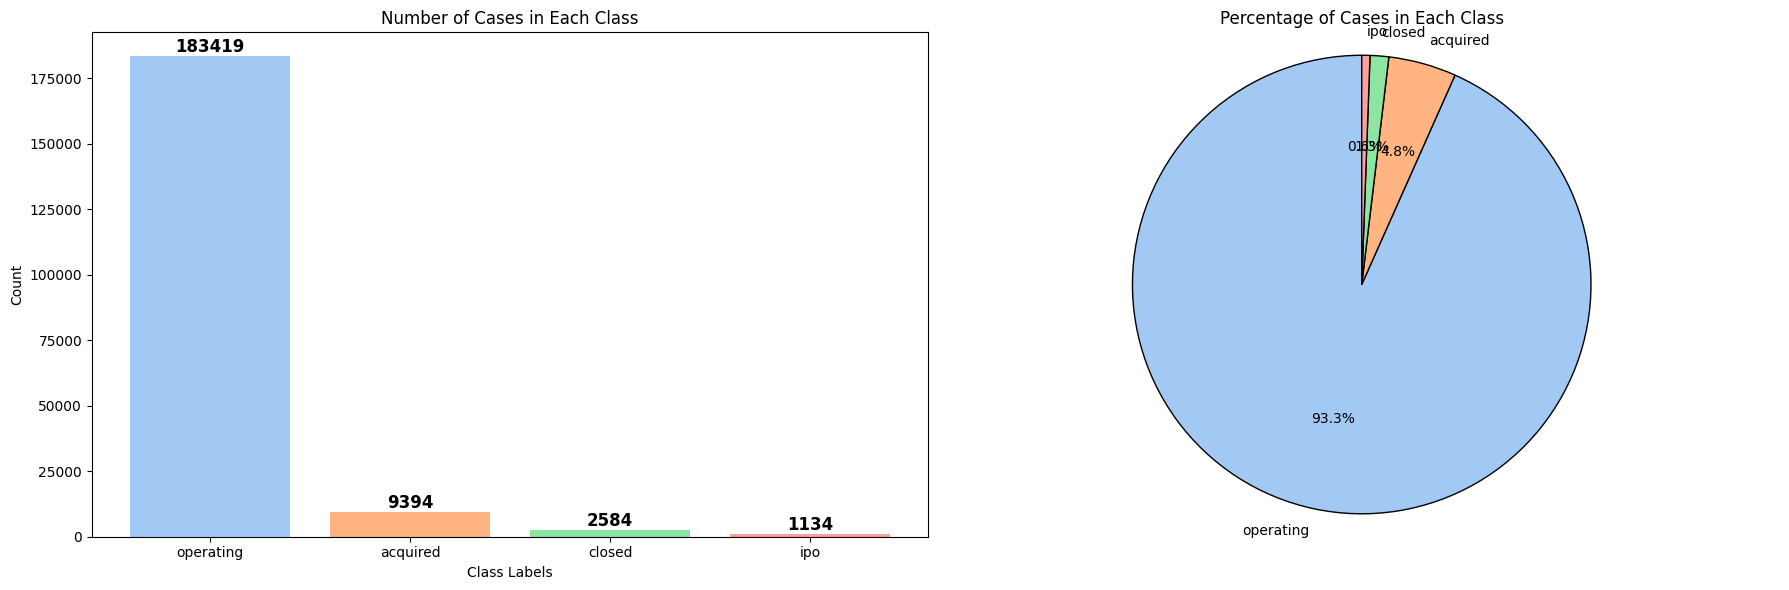

In [25]:
# Count the number of cases for each class
class_counts = new_df['status'].value_counts()
class_labels = class_counts.index.tolist()
class_values = class_counts.tolist()

pastel_palette = sns.color_palette('pastel', n_colors=7)


fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot the bar chart on the first subplot (axes[0])
bars = axes[0].bar(class_labels, class_values, color=pastel_palette)
for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height, str(height),
                 ha='center', va='bottom', fontweight='bold', fontsize=12)

axes[0].set_title('Number of Cases in Each Class')
axes[0].set_xlabel('Class Labels')
axes[0].set_ylabel('Count')


# Create a pie chart on the second subplot (axes[1])
axes[1].pie(class_values, labels=class_labels, autopct='%1.1f%%', startangle=90, colors=pastel_palette,
            wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
axes[1].set_title('Percentage of Cases in Each Class')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()


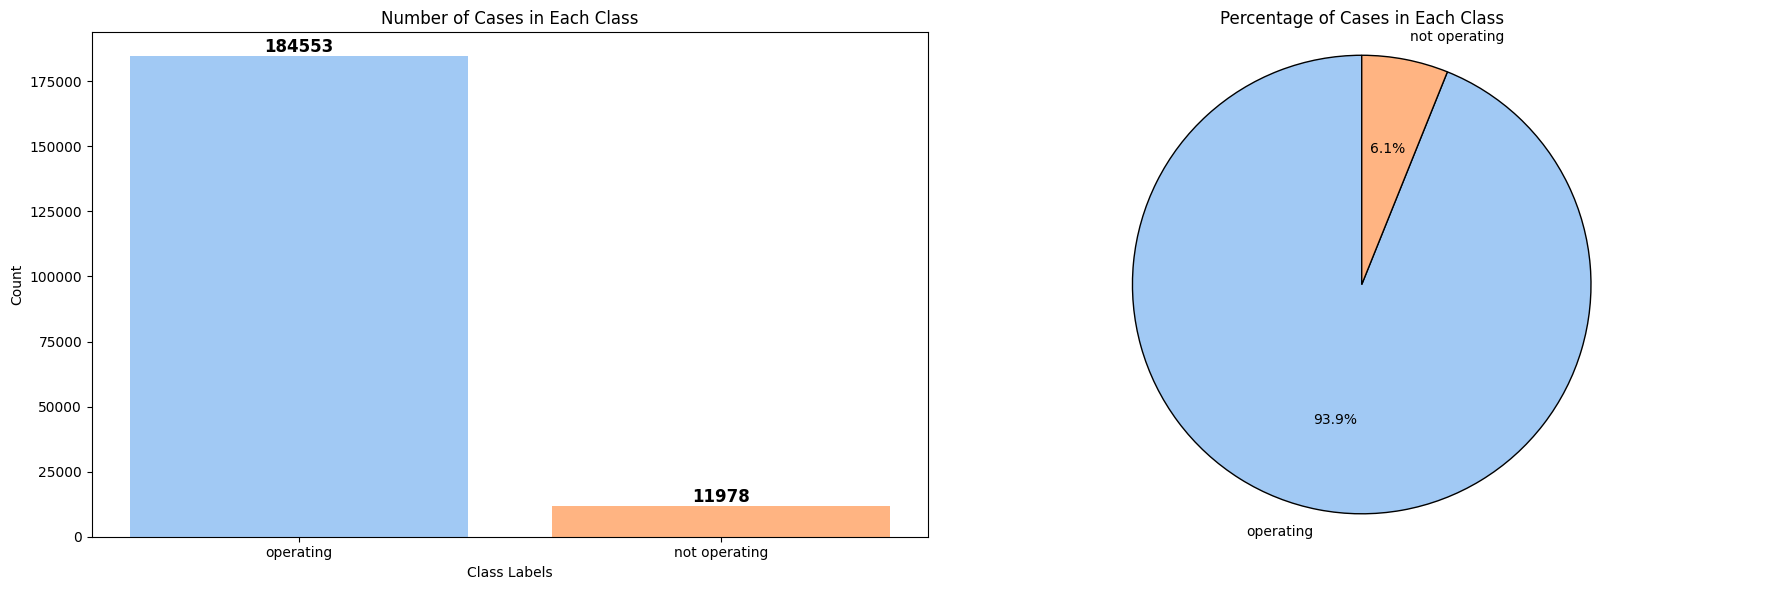

In [26]:
# Count the number of cases for each class
class_counts = new_df['operational_status'].value_counts()
class_labels = class_counts.index.tolist()
class_values = class_counts.tolist()

pastel_palette = sns.color_palette('pastel', n_colors=7)


fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot the bar chart on the first subplot (axes[0])
bars = axes[0].bar(class_labels, class_values, color=pastel_palette)
for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height, str(height),
                 ha='center', va='bottom', fontweight='bold', fontsize=12)

axes[0].set_title('Number of Cases in Each Class')
axes[0].set_xlabel('Class Labels')
axes[0].set_ylabel('Count')


# Create a pie chart on the second subplot (axes[1])
axes[1].pie(class_values, labels=class_labels, autopct='%1.1f%%', startangle=90, colors=pastel_palette,
            wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
axes[1].set_title('Percentage of Cases in Each Class')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()


In [27]:
# Selecting rows with status 'ipo'
ipo_rows = new_df[new_df['status'] == 'ipo']

# Selecting rows with status 'operating' until 12,000 rows are reached
operating_rows = new_df[new_df['status'] == 'operating'].head(12000 - len(ipo_rows))

# Concatenating the two subsets of rows
operating_rows = pd.concat([ipo_rows, operating_rows])

In [28]:
# Selecting rows with status 'ipo'
not_operating_rows = new_df[new_df['status'].isin(['closed', 'acquired'])]

# Concatenating the two subsets of rows
new_df_2 = pd.concat([not_operating_rows, operating_rows])

In [29]:
new_df_2

,entity_id,name,status,region,created_at,updated_at,operational_status
1,10,Flektor,acquired,Los Angeles,2007-05-31 21:11:51,2008-05-23 23:23:14,not operating
2,100,There,acquired,SF Bay,2007-08-06 23:52:45,2013-11-04 02:09:48,not operating
13,1001,FriendFeed,acquired,SF Bay,2007-10-01 10:17:13,2013-03-13 21:44:15,not operating
16,10012,moviestring.com,closed,unknown,2008-08-24 23:07:26,2010-10-01 00:12:22,not operating
18,10014,Mobclix,acquired,SF Bay,2008-08-25 01:32:43,2012-09-22 03:36:21,not operating
...,...,...,...,...,...,...,...
12112,147541,Scrabble Aid,operating,unknown,2012-01-23 10:33:41,2012-01-23 19:11:52,operating
12113,147542,remove,operating,Amsterdam,2012-01-23 11:12:48,2013-07-11 02:44:13,operating
12114,147544,car2go,operating,unknown,2012-01-23 12:09:23,2012-01-23 12:09:23,operating
12115,147545,Speechpath- VoIP Phones Ireland,operating,unknown,2012-01-23 13:13:27,2012-01-23 19:10:01,operating


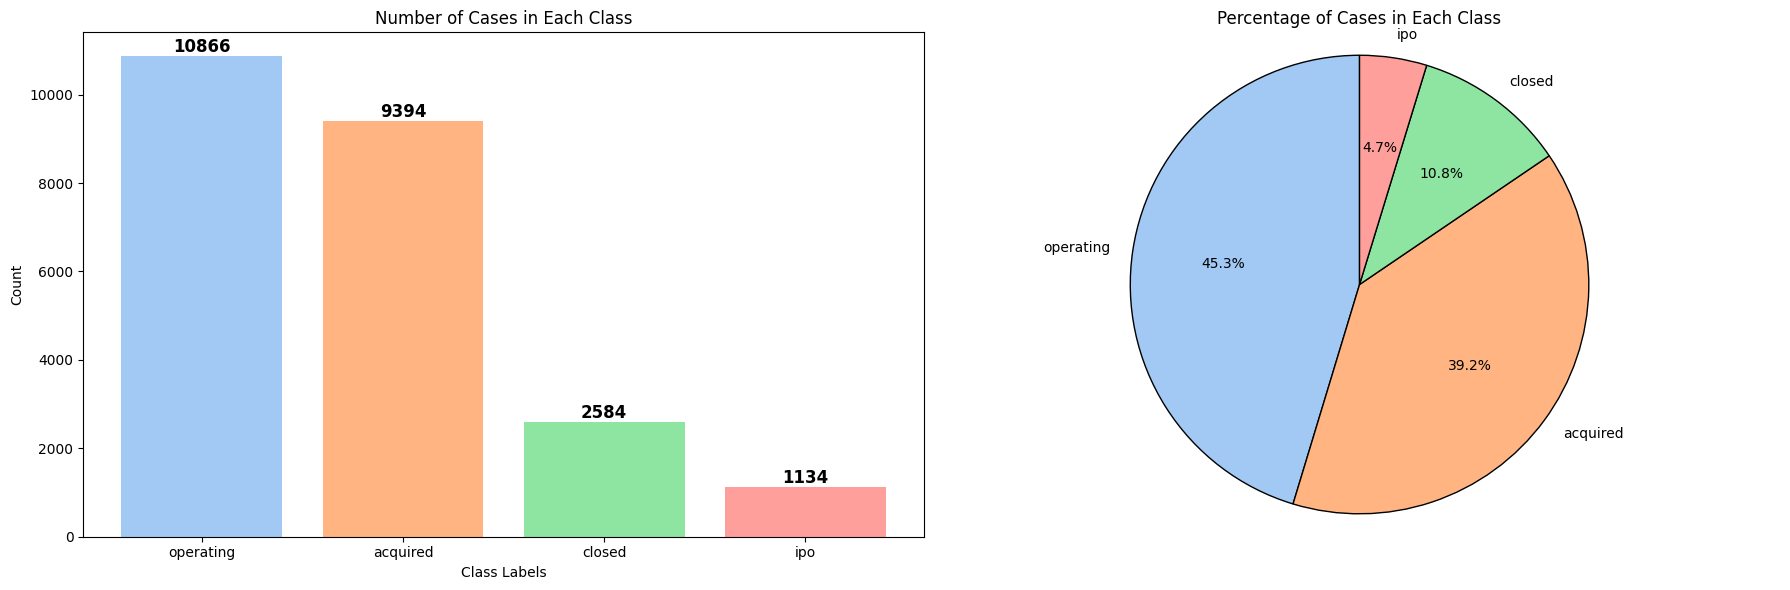

In [30]:
# Count the number of cases for each class
class_counts = new_df_2['status'].value_counts()
class_labels = class_counts.index.tolist()
class_values = class_counts.tolist()

pastel_palette = sns.color_palette('pastel', n_colors=7)


fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot the bar chart on the first subplot (axes[0])
bars = axes[0].bar(class_labels, class_values, color=pastel_palette)
for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height, str(height),
                 ha='center', va='bottom', fontweight='bold', fontsize=12)

axes[0].set_title('Number of Cases in Each Class')
axes[0].set_xlabel('Class Labels')
axes[0].set_ylabel('Count')


# Create a pie chart on the second subplot (axes[1])
axes[1].pie(class_values, labels=class_labels, autopct='%1.1f%%', startangle=90, colors=pastel_palette,
            wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
axes[1].set_title('Percentage of Cases in Each Class')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()


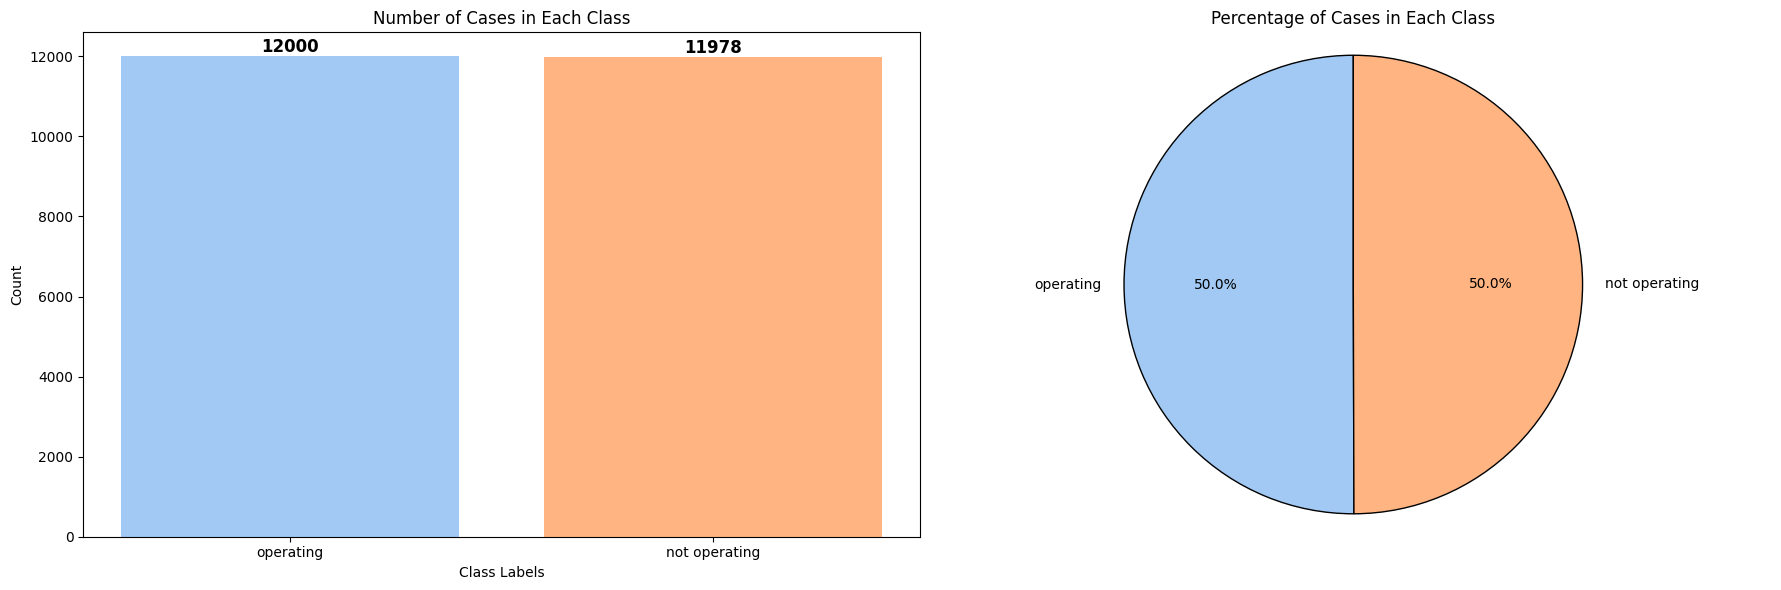

In [31]:
# Count the number of cases for each class
class_counts = new_df_2['operational_status'].value_counts()
class_labels = class_counts.index.tolist()
class_values = class_counts.tolist()

pastel_palette = sns.color_palette('pastel', n_colors=7)


fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot the bar chart on the first subplot (axes[0])
bars = axes[0].bar(class_labels, class_values, color=pastel_palette)
for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height, str(height),
                 ha='center', va='bottom', fontweight='bold', fontsize=12)

axes[0].set_title('Number of Cases in Each Class')
axes[0].set_xlabel('Class Labels')
axes[0].set_ylabel('Count')


# Create a pie chart on the second subplot (axes[1])
axes[1].pie(class_values, labels=class_labels, autopct='%1.1f%%', startangle=90, colors=pastel_palette,
            wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
axes[1].set_title('Percentage of Cases in Each Class')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()


In [32]:
pp.ProfileReport(new_df_2)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]